# Assignment 5
### By: Mitchell Humphries

In [12]:
#General Import
import numpy as np
from numpy import random
import matplotlib.pylab as plt
import math as m

# 1. A 2D RANDOM WALK

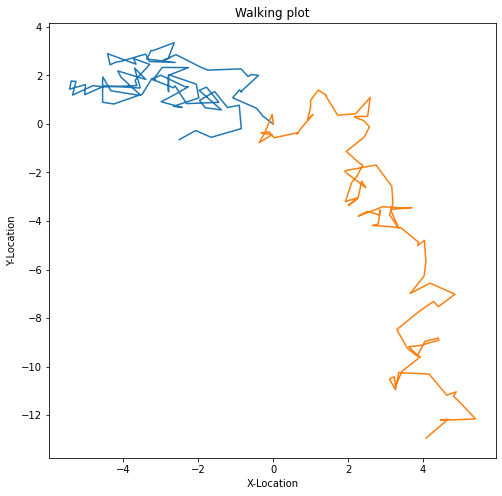

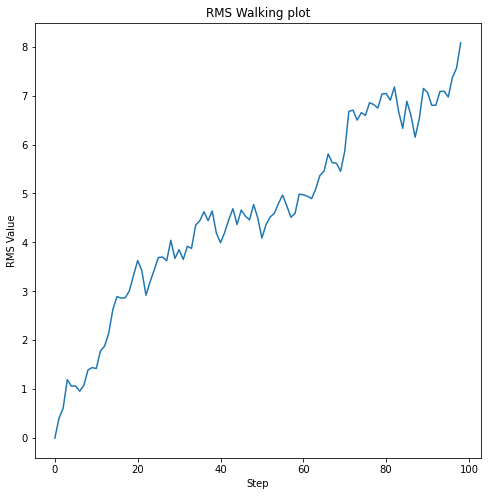

In [13]:
#def for taking random step
def randomStep(stepLength):
    angle = 2*m.pi*random.rand()
    randomlength = stepLength * random.rand()
    stepX = np.cos(angle) * randomlength
    stepY = np.sin(angle) * randomlength
    return stepX, stepY

#Make 2 objetcs 25 steps. #NOTE: ARRAYS HOLD ALL POSITIONS.
maxStep = 100
stepSize = 1 #NOTE: THIS IS "a/2"
obj1 = np.zeros(shape=(2,maxStep-1)) # Arry is 25 long, 2 tall. [0:#] is X positionm [1:#] is y position
obj2 = np.zeros(shape=(2,maxStep-1)) 

for i in range(1,maxStep-1):
    #Get step and add for obj 1
    s1x, s1y = randomStep(stepSize)
    obj1[0,i] = obj1[0,i-1] + s1x
    obj1[1,i] = obj1[1,i-1] + s1y
    #Get step and add for obj 2
    s2x, s2y = randomStep(stepSize)
    obj2[0,i] = obj2[0,i-1] + s2x
    obj2[1,i] = obj2[1,i-1] + s2y
    
#Make 2 walking plots
plt.figure(figsize=(8,8))
plt.plot(obj1[0,:],obj1[1,:],label = "Walk 1")
plt.plot(obj2[0,:],obj2[1,:],label = "Walk 2")
plt.title('Walking plot')
plt.xlabel('X-Location')
plt.ylabel('Y-Location')
plt.show()

#Def for getting means quared
def getRMS(Array):
    total = np.zeros(maxStep-1)
    for i in range(0,maxStep-1):
        total[i] = (Array[0,i]**2 + Array[1,i]**2) ** (1/2)
    return total

#get root mean squared.
RMS1 = getRMS(obj1)
RMS2 = getRMS(obj2)
RMStotal = (RMS1 + RMS2)/2
plt.figure(figsize=(8,8))
#plt.plot(range(0,len(RMS1)),RMS1,label = "Walk 1")
#plt.plot(range(0,len(RMS2)),RMS2,label = "Walk 2")
plt.plot(range(0,len(RMStotal)),RMStotal,label = "RMS AVG")
plt.title('RMS Walking plot')
plt.xlabel('Step')
plt.ylabel('RMS Value')
plt.show()



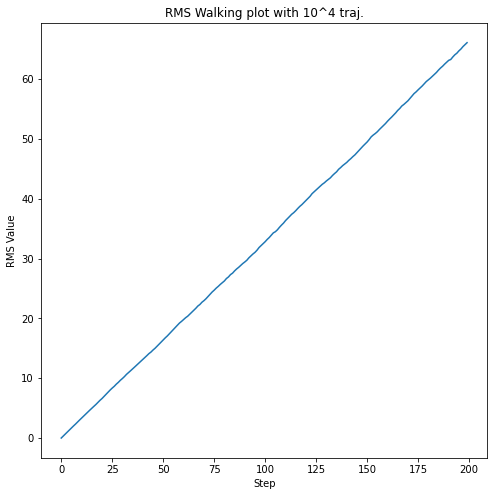

In [16]:
#Declare constants
stepSize = 1
numberOfTraj = 10**4
stepSize = 2 #NOTE: THIS IS "a" in a/2
maxStep = 200

#Make 2 objetcs 25 steps. #NOTE: ARRAYS HOLD ALL POSITIONS.
objArray = np.zeros(shape=(2,numberOfTraj-1)) # Arrya is 25 long, 2 tall. [0:#] is X positionm [1:#] is y position
RMSvalues  = np.zeros(maxStep)
for s in range(1,maxStep): #Loop for total number of steps
    total = 0 #RMS value
    for i in range(0,numberOfTraj-1): #Loop for total number of objects
        sx, sy = randomStep(stepSize)
        objArray[0,i] = objArray[0,i] + sx
        objArray[1,i] = objArray[1,i] + sy
        total = total + (objArray[0,i]**2 + objArray[1,i]**2) ** 1/2
    #Get and store number RMS distance for each step 
    RMSvalues[s] = (total/numberOfTraj) ** 1/2
    
plt.figure(figsize=(8,8))
plt.plot(range(0,len(RMSvalues)),RMSvalues)
plt.title('RMS Walking plot with 10^4 traj.')
plt.xlabel('Step')
plt.ylabel('RMS Value')
plt.show()

### Analysis

# 2.RANDOM WALK WITH A PREFERRED DIRECTION

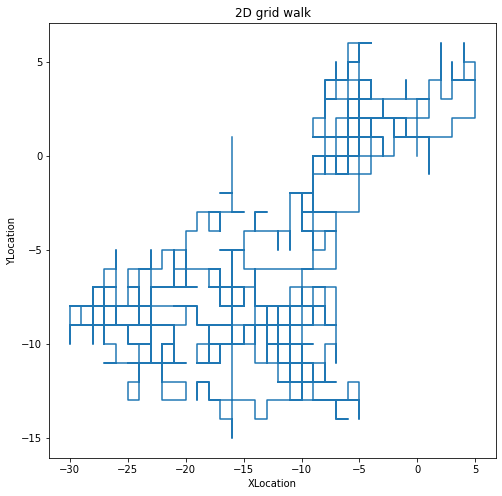

In [42]:
#Decalre constsnts

#Make random step function. 
def gridwalk1(numSteps):
    Xpos = np.zeros(numSteps)
    Ypos = np.zeros(numSteps)
    for i in range(1,numSteps):
        Xpos[i] = Xpos[i-1]
        Ypos[i] = Ypos[i-1]
        num = random.rand()
        if num <= 0.3:
            #Move left
            Xpos[i] = Xpos[i] - 1
            #print("moved left")
        elif num <= 0.6:
            #Move Right
            Xpos[i] = Xpos[i] + 1
            #print("moved Right")
        elif num <= 0.8:
            #Move up
            Ypos[i] = Ypos[i] + 1
            #print("moved Up")
        elif num <= 1.0:
            #Move down
            Ypos[i] = Ypos[i] - 1
            #print("moved down")
            
    return Xpos,Ypos

X1,Y1 = gridwalk1(1000)
plt.figure(figsize=(8,8))
plt.plot(X1,Y1)
plt.title('2D grid walk')
plt.xlabel('XLocation')
plt.ylabel('YLocation')
plt.show()
